In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r"D:\Akash\clust. proj\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.shape

(167, 10)

In [7]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [8]:
df.income.describe()[1:]

mean     17144.688623
std      19278.067698
min        609.000000
25%       3355.000000
50%       9960.000000
75%      22800.000000
max     125000.000000
Name: income, dtype: float64

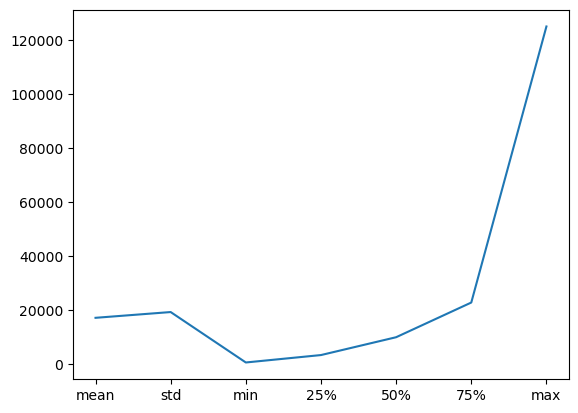

In [9]:
plt.plot(df.income.describe()[1:])


In [10]:
inc = df[df['income'] < 5000]
inc.shape

(52, 10)

In [11]:
df.child_mort.describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

In [12]:
filtered_df = df[df['child_mort'] < 5]
filtered_df.shape

(26, 10)

In [13]:
df.health.describe()

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: float64

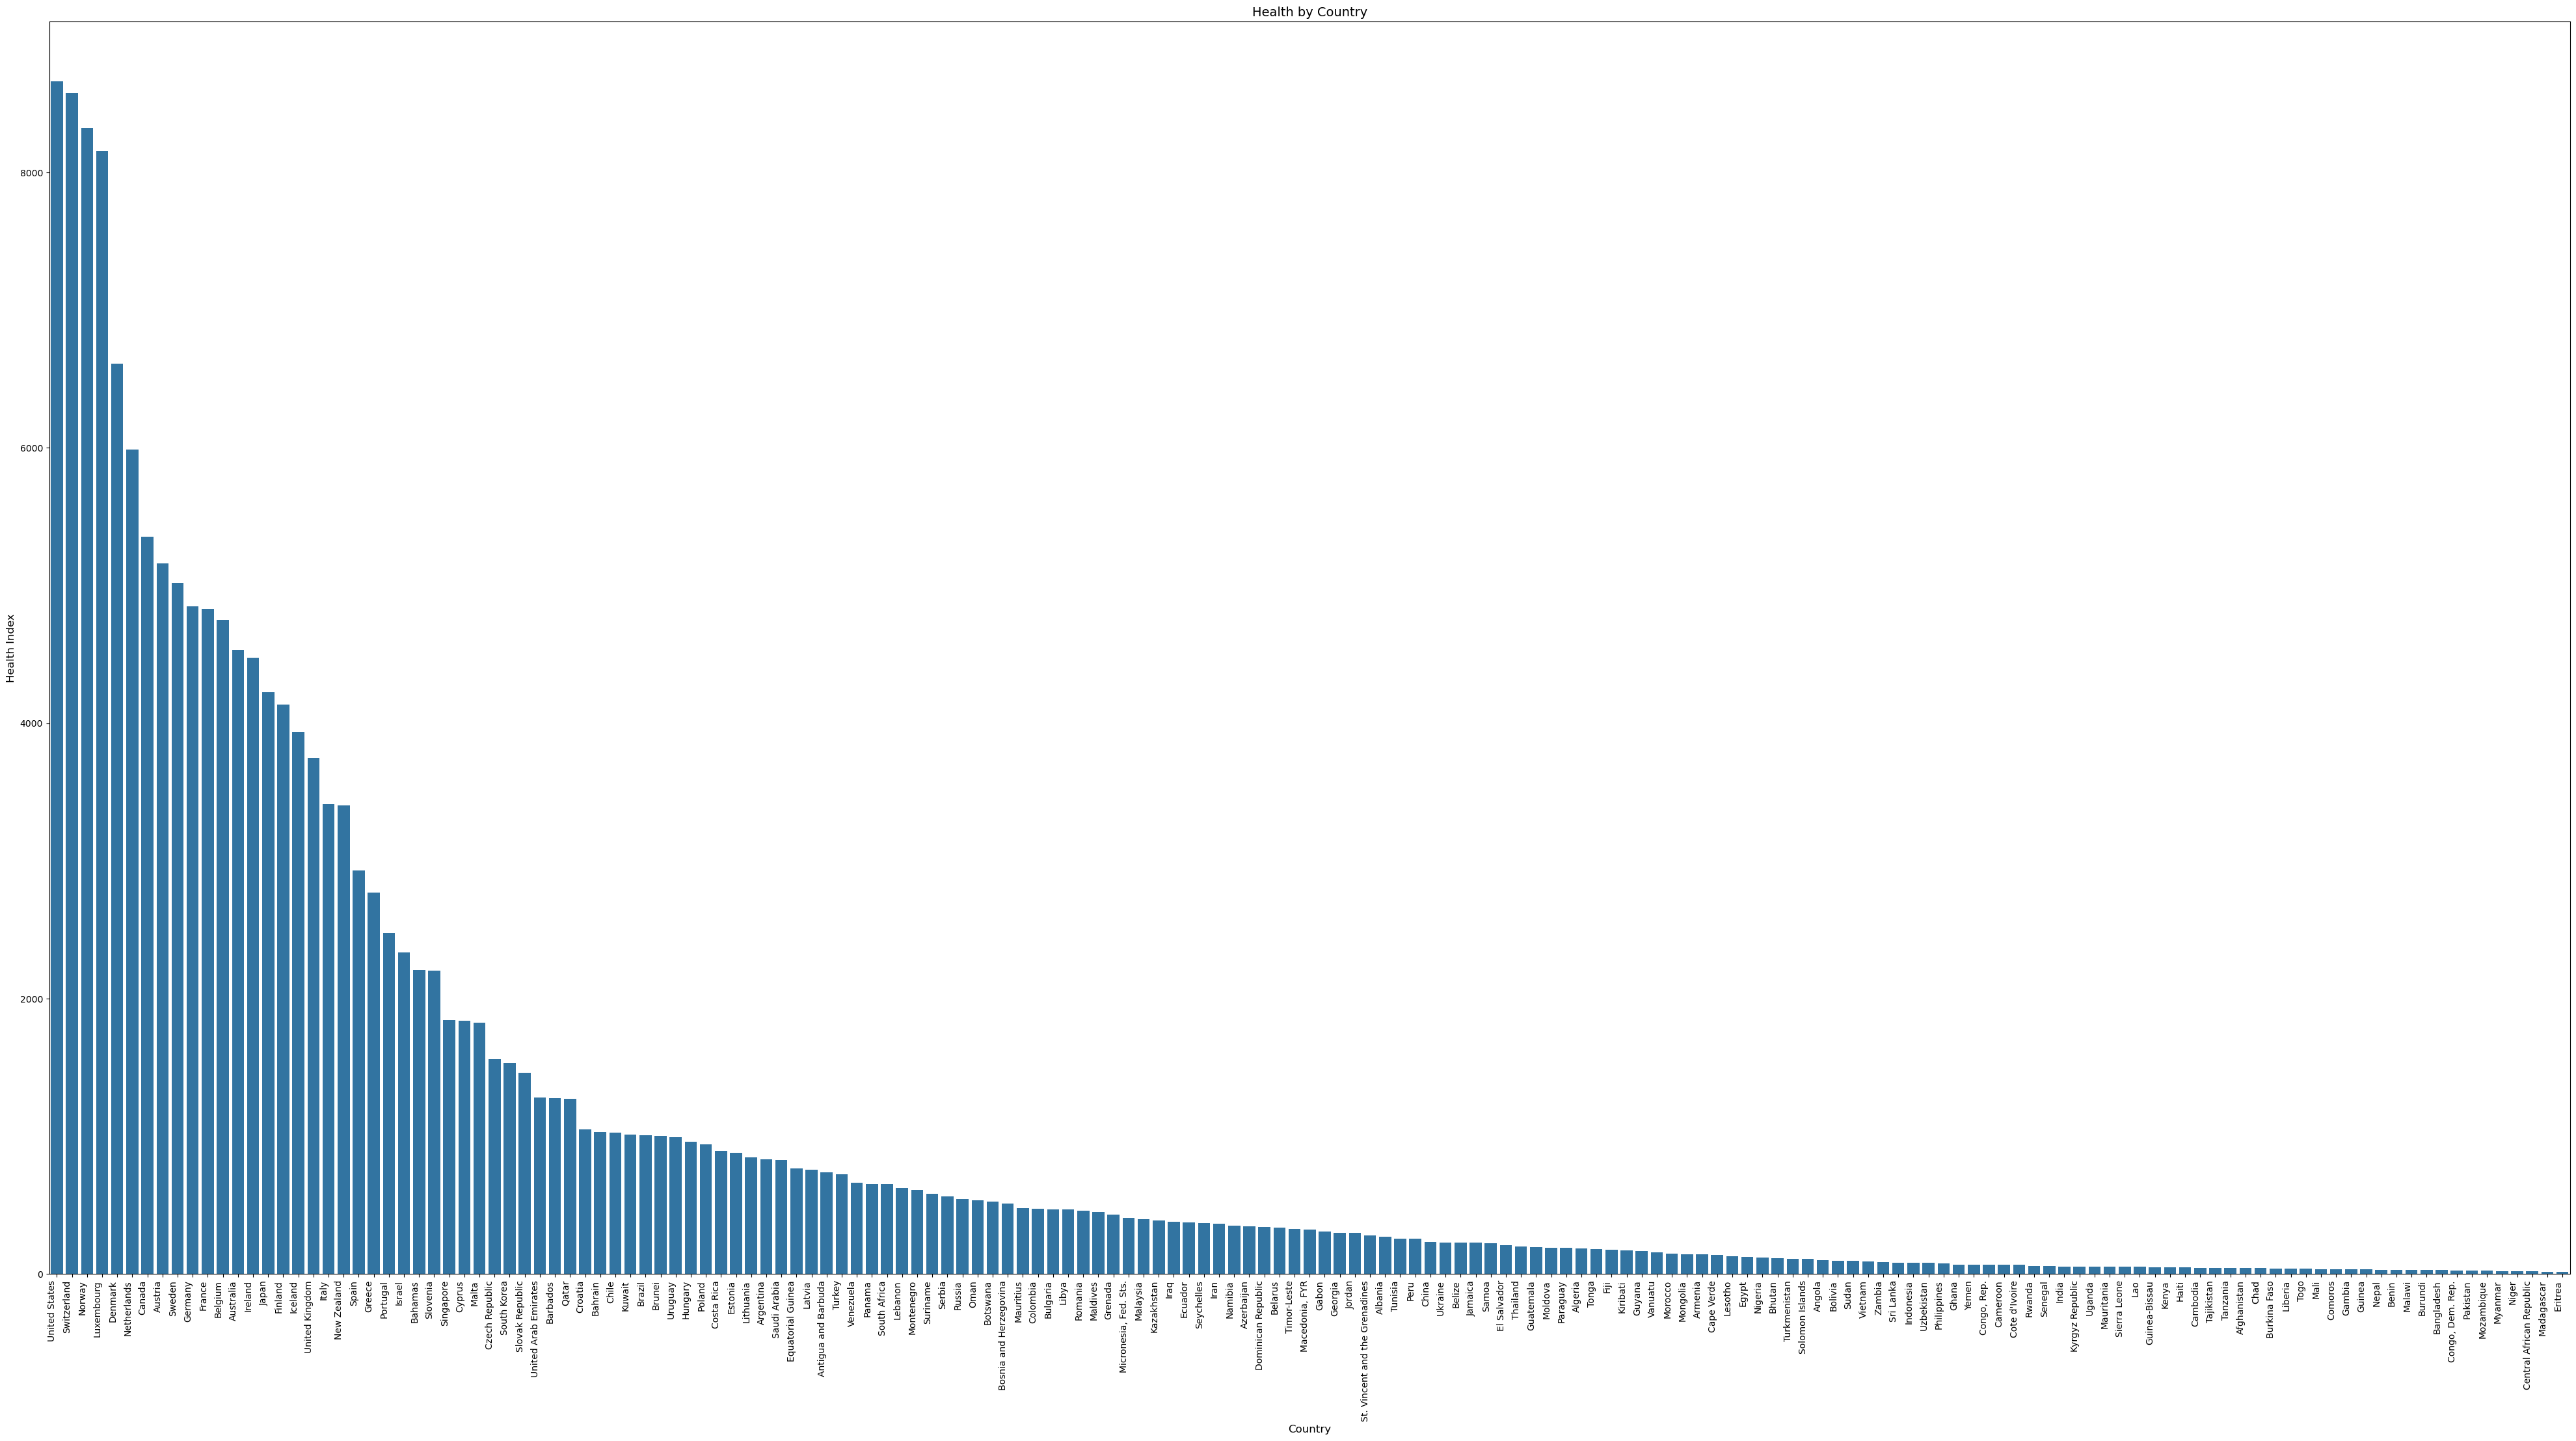

In [14]:
df_health = df.sort_values(by='health', ascending=False)  
# Plot
plt.figure(figsize=(50, 25))  # Wider figure
sns.barplot(x='country', y='health', data=df_health)
plt.title('Health by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Health Index', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.show()

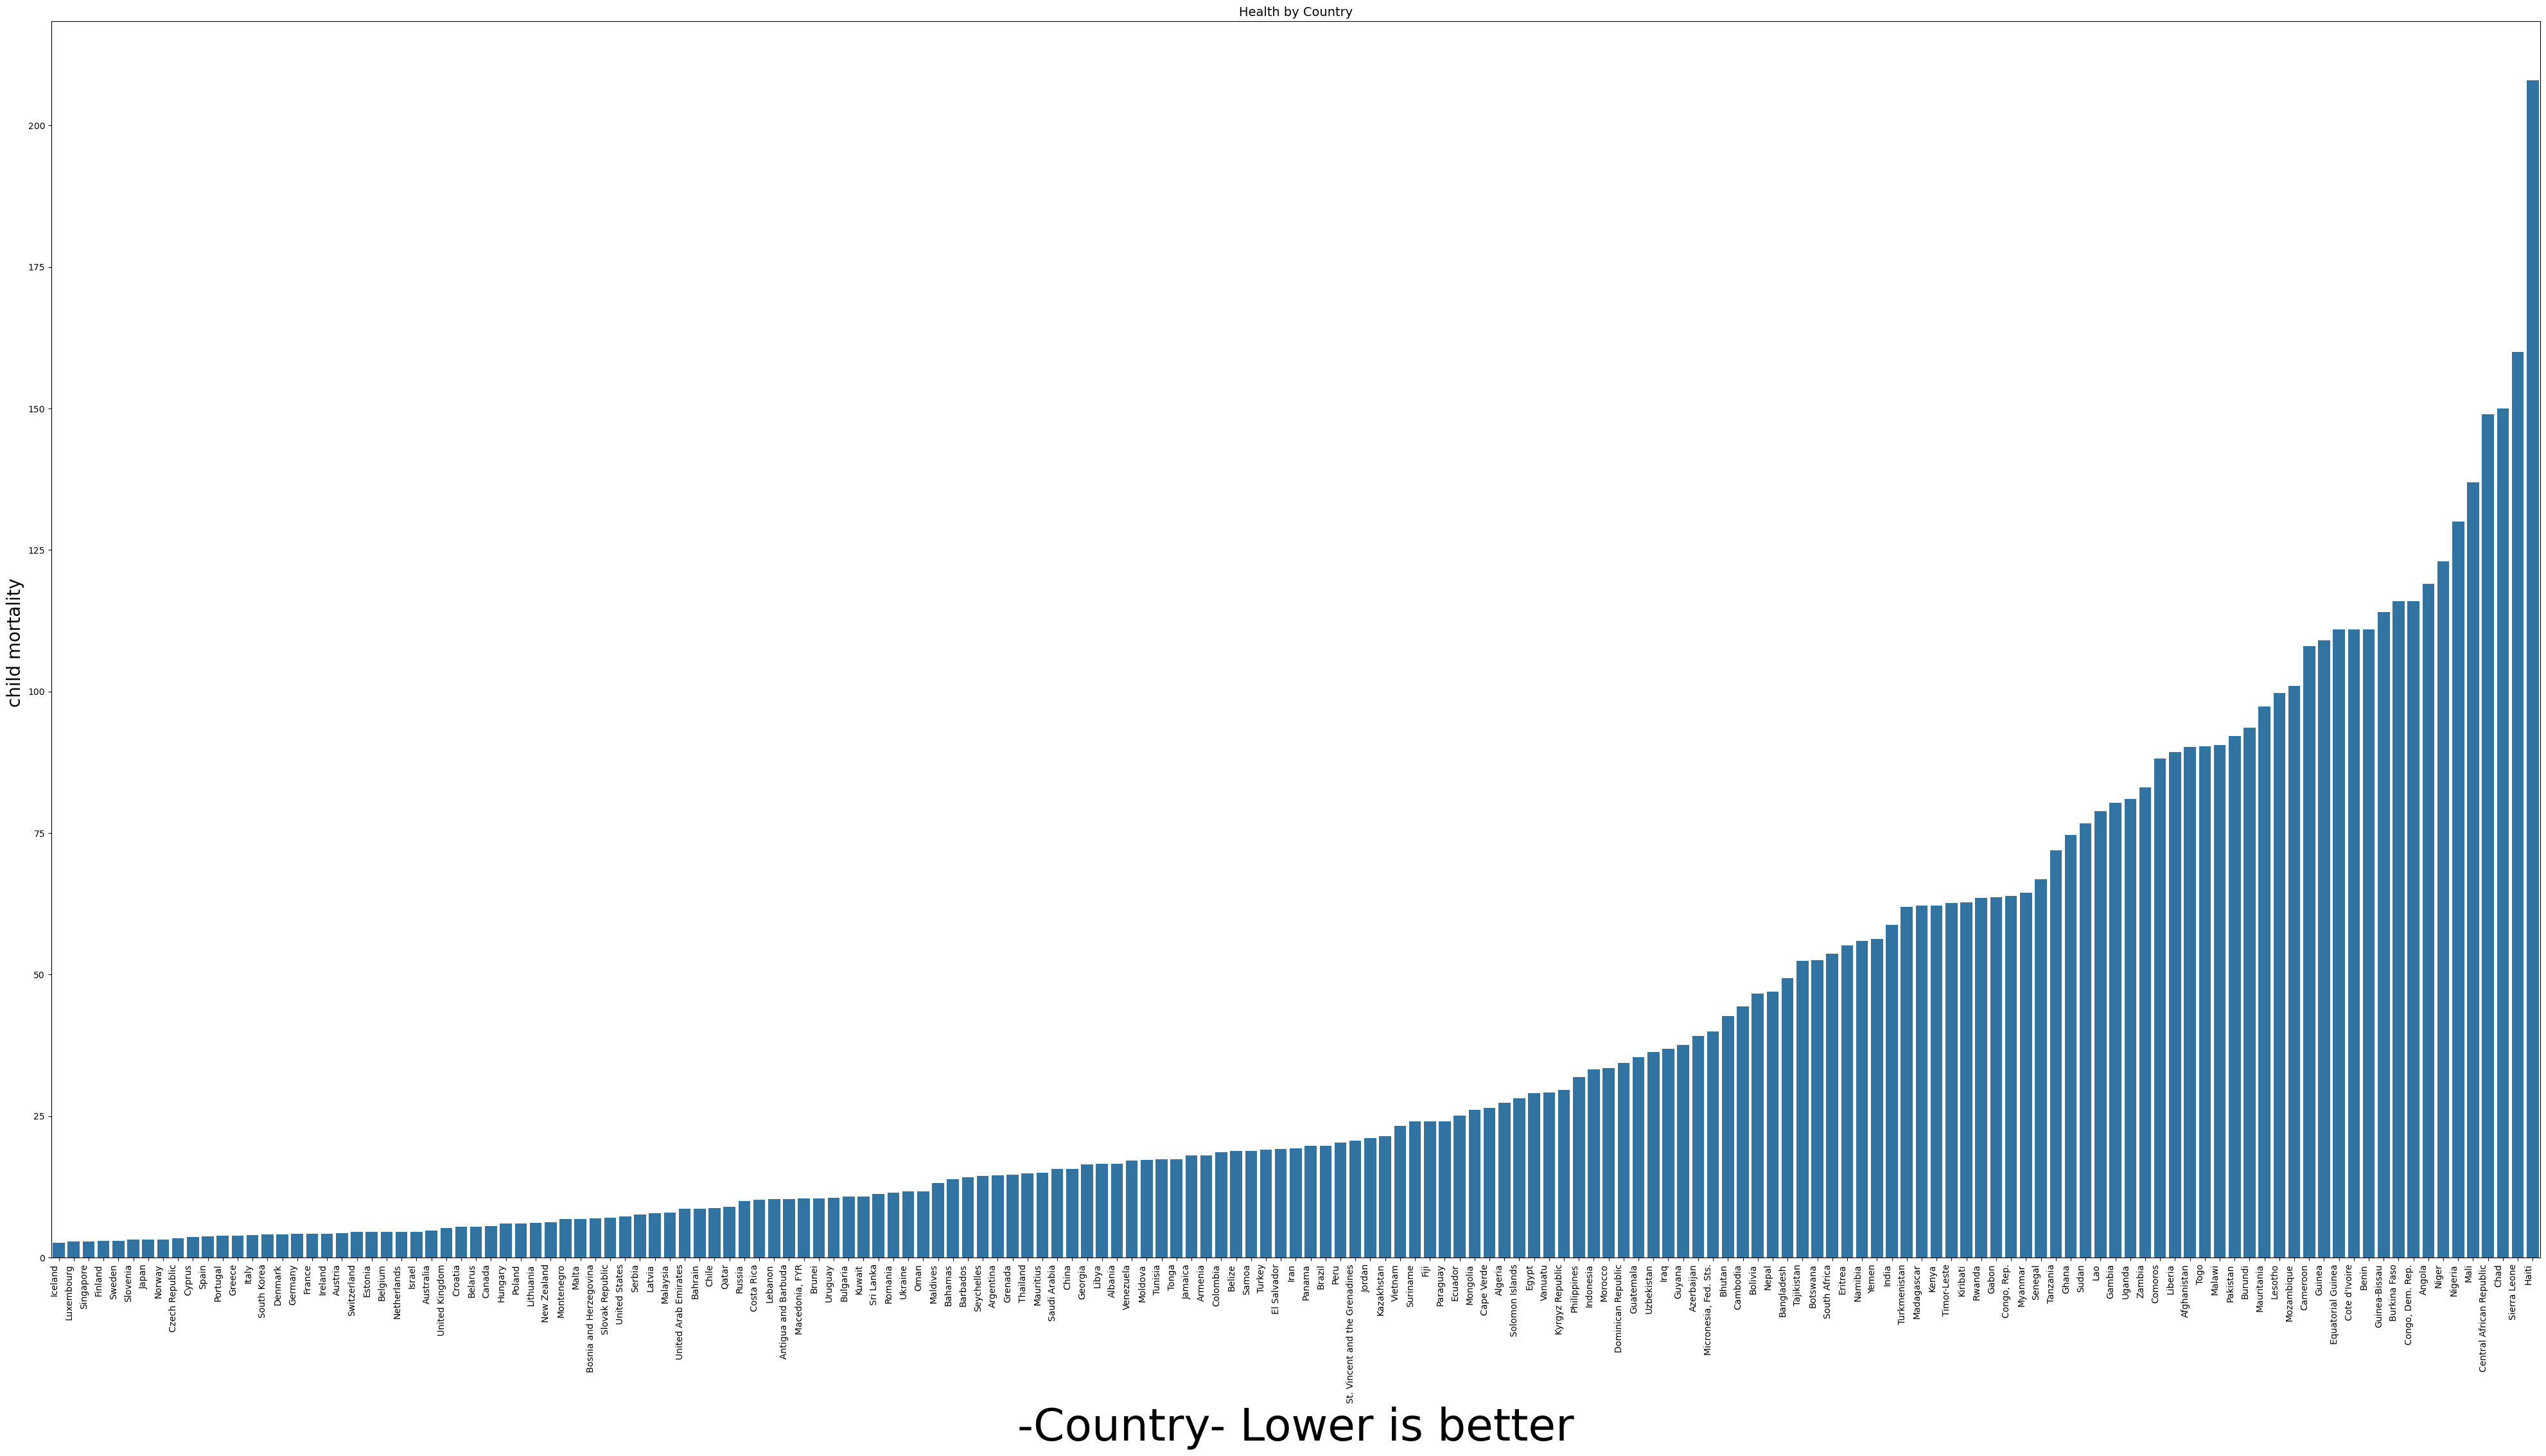

In [15]:
df_child = df.sort_values(by='child_mort', ascending=True)  # Change to ascending=True for ascending order

# Plot
plt.figure(figsize=(50, 25))  # Wider figure
sns.barplot(x='country', y='child_mort', data=df_child)
plt.title('Health by Country', fontsize=14)
plt.xlabel('-Country- Lower is better', fontsize=50)
plt.ylabel('child mortality ', fontsize=20)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.show()

In [16]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [17]:
df.gdpp.describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

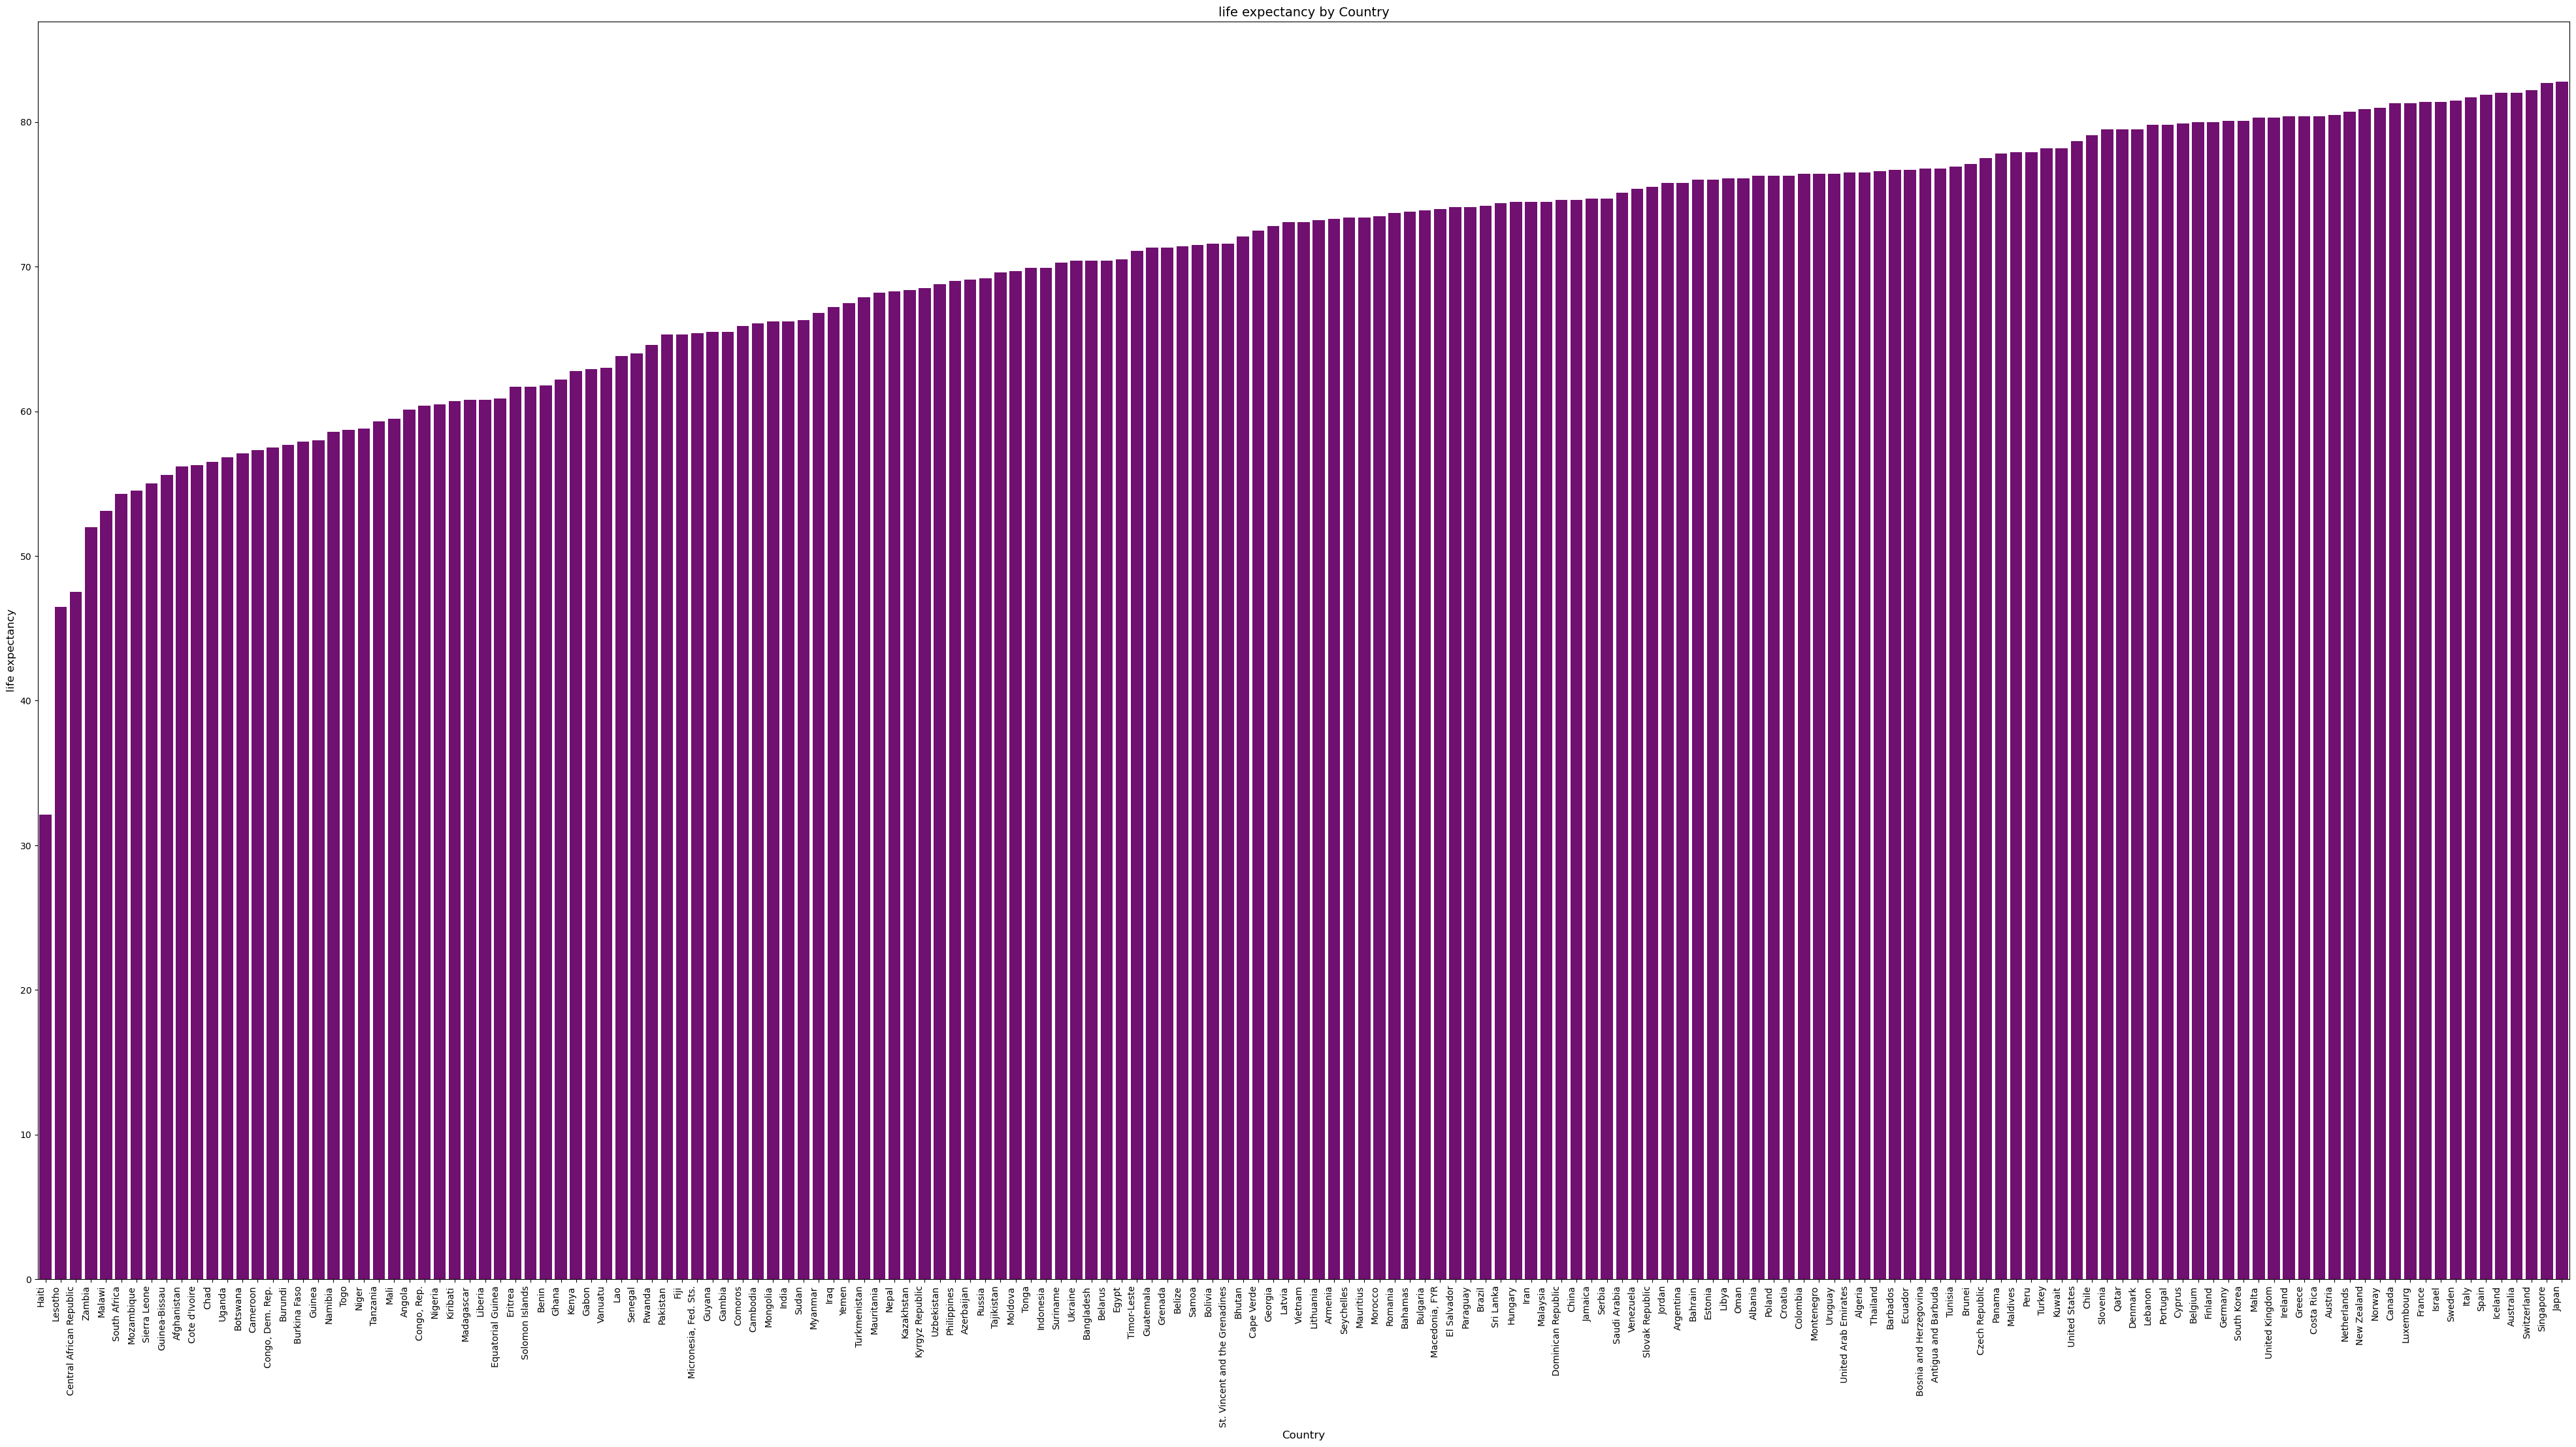

In [18]:
df_life = df.sort_values(by='life_expec', ascending=True)  # Change to ascending=True for ascending order

# Plot
plt.figure(figsize=(50, 25))  # Wider figure
sns.barplot(x='country', y='life_expec', data=df_life,color='purple')
plt.title('life expectancy by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('life expectancy', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.show()

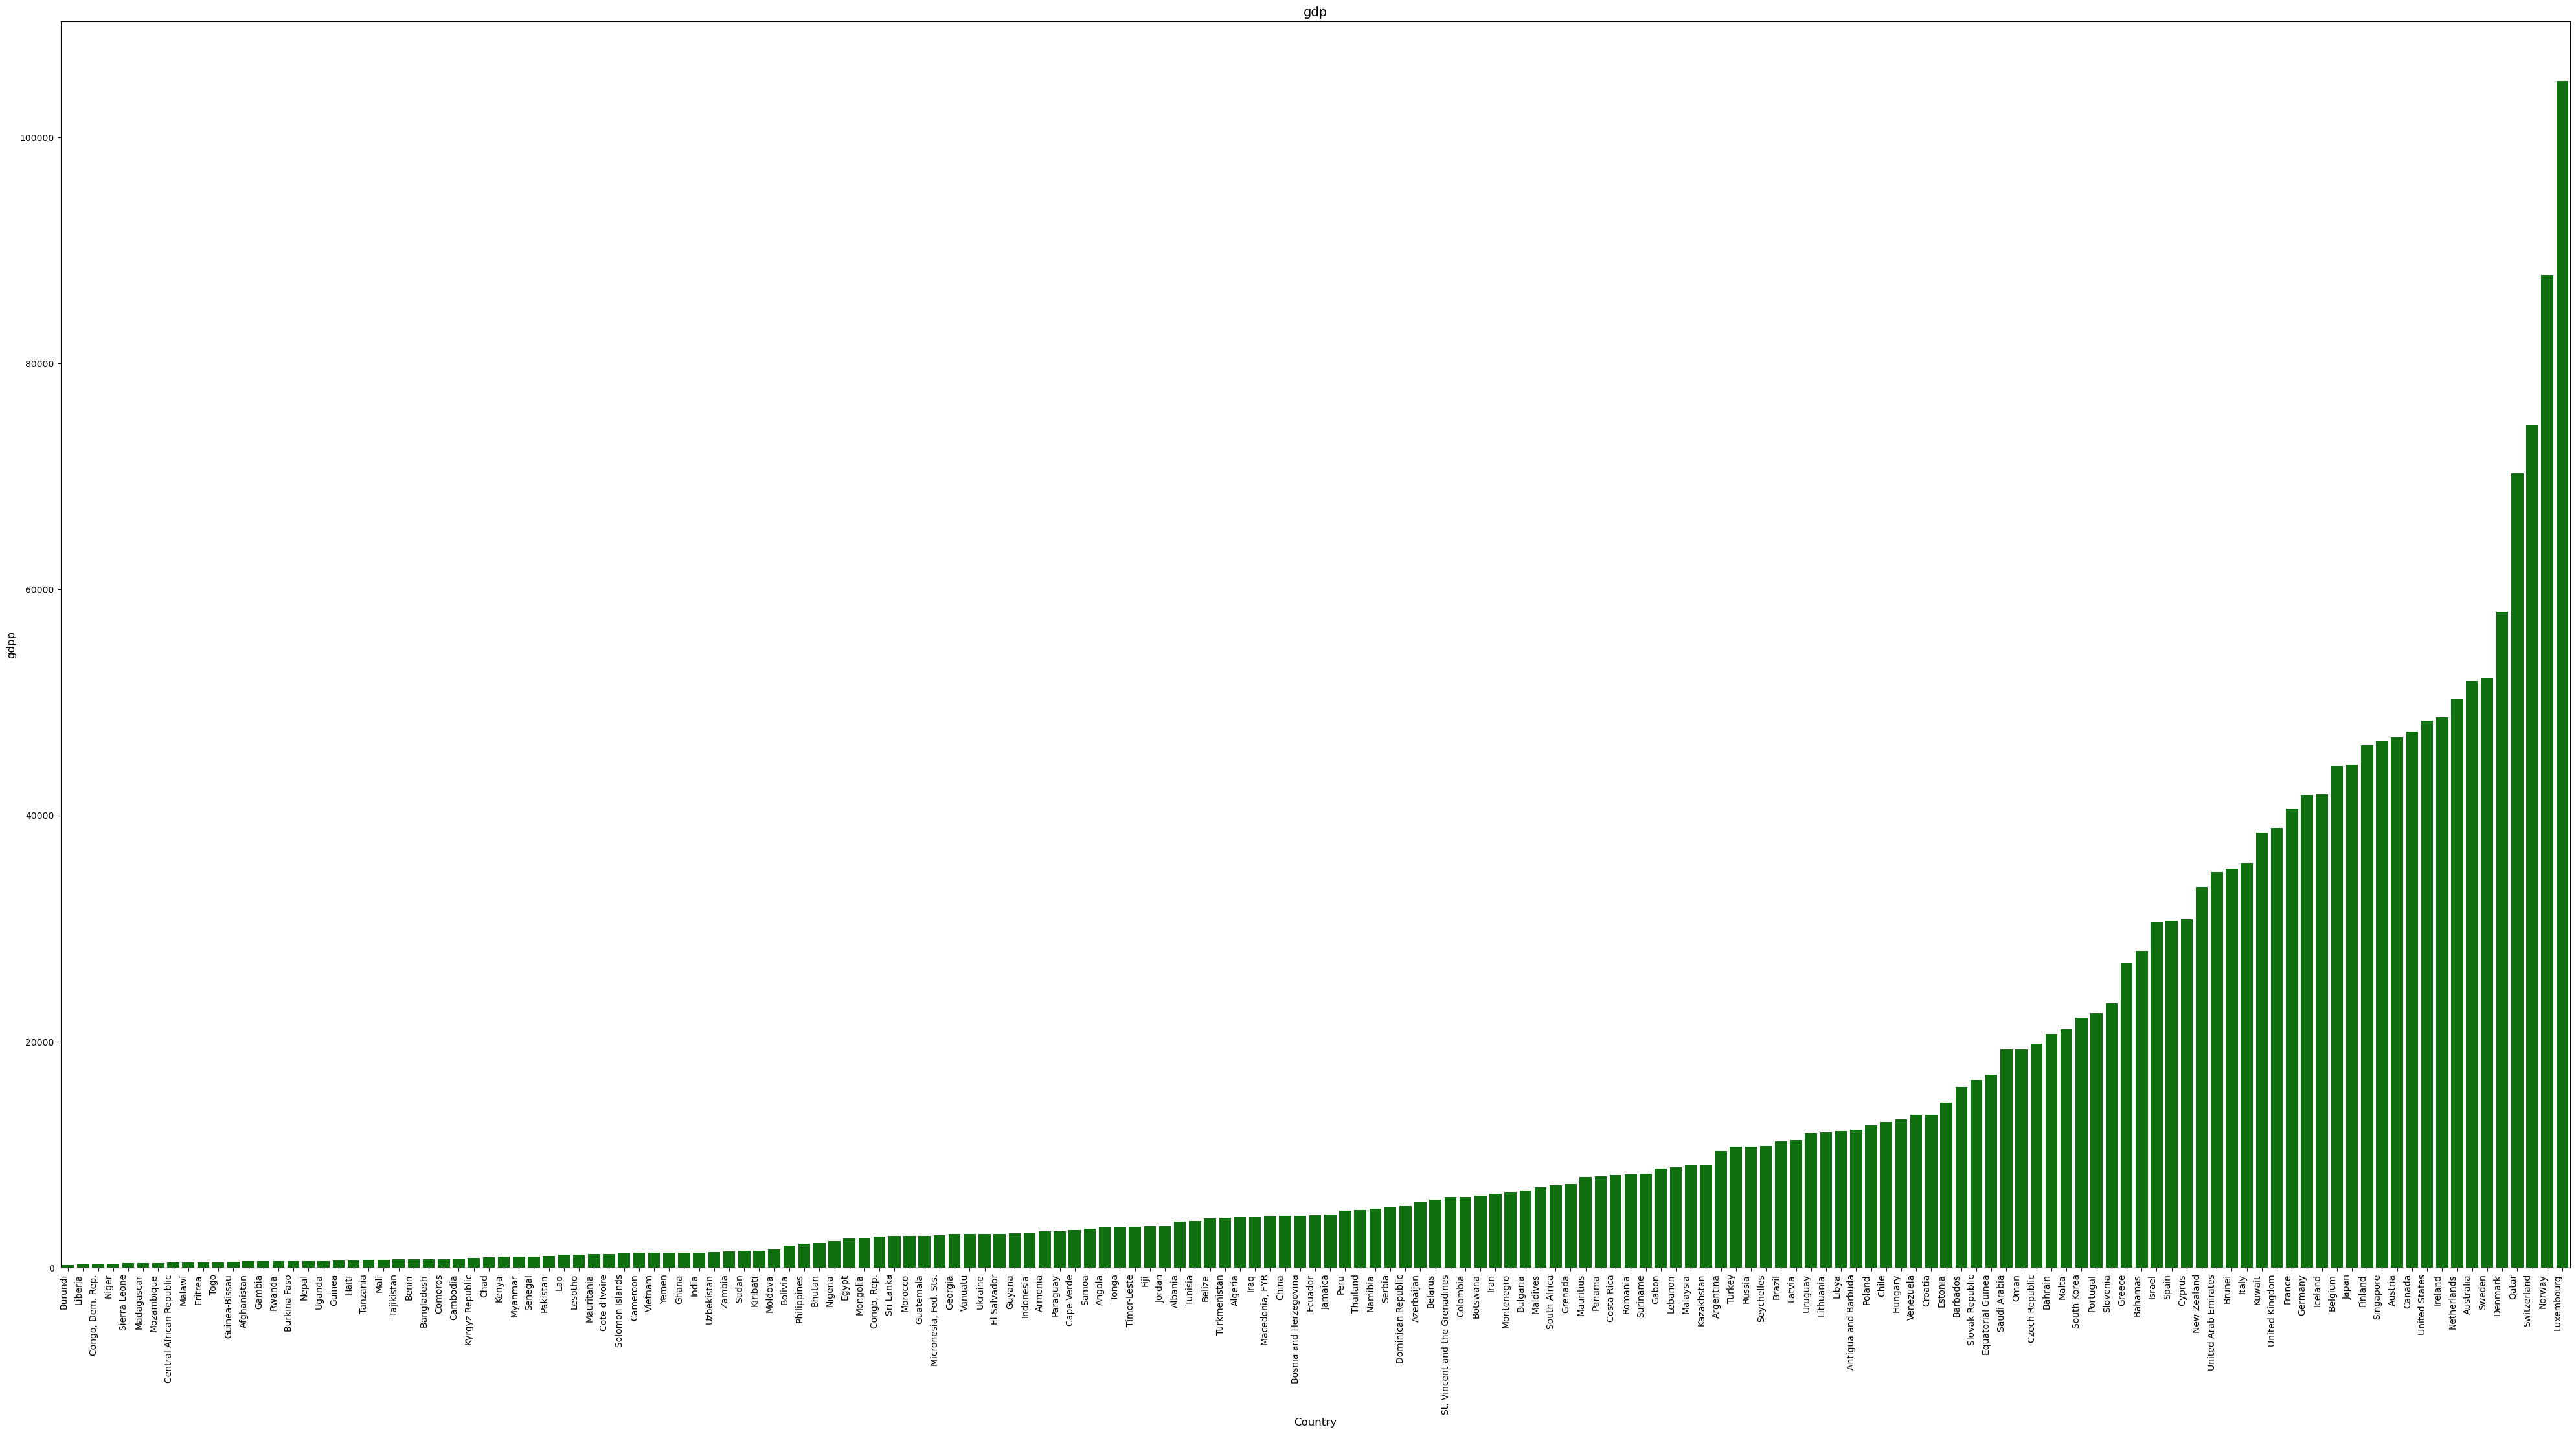

In [19]:
df_life = df.sort_values(by='gdpp', ascending=True)  # Change to ascending=True for ascending order

# Plot
plt.figure(figsize=(50, 25))  # Wider figure
sns.barplot(x='country', y='gdpp', data=df_life, color='green')
plt.title('gdp', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('gdpp', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.show()

In [20]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [21]:
df2= df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [22]:
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


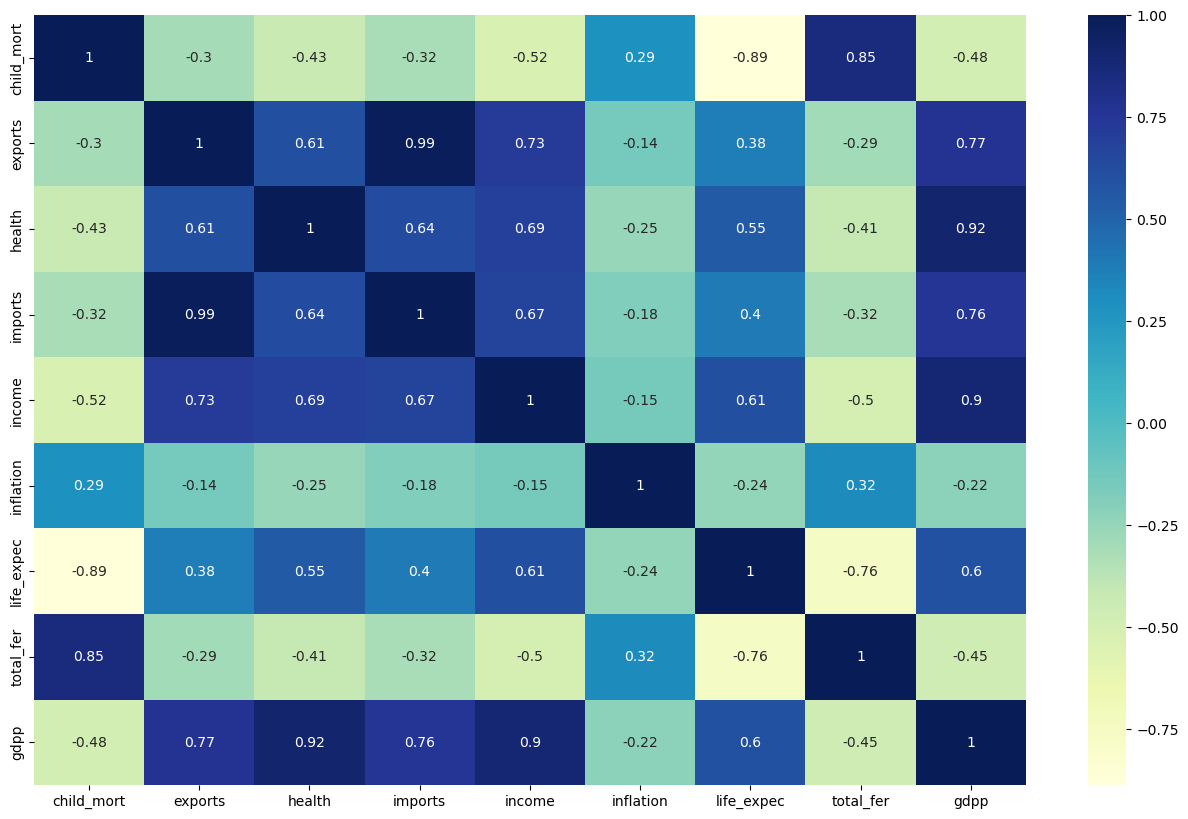

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [24]:
#scaling
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler()
scaled = stdscale.fit_transform(df2)
dfs = pd.DataFrame(scaled)
dfs.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
dfs.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [25]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
#VIF variance Inflation Factor for Feature Selection
def calc_vif(dfs):
    vif = pd.DataFrame()
    vif['Variables'] = dfs.columns
    vif['VIF'] = [variance_inflation_factor(dfs.values,i) for i in range(dfs.shape[1])]
    vif = vif.sort_values(by='VIF',ascending = False)
    return vif

In [27]:
calc_vif(dfs)

,Variables,VIF
1,exports,116.652517
3,imports,101.647811
8,gdpp,49.647627
2,health,18.818141
4,income,14.906308
0,child_mort,7.294127
6,life_expec,6.006097
7,total_fer,3.896214
5,inflation,1.200193


In [28]:
dfs = dfs.drop(columns = 'exports')
calc_vif(dfs)

,Variables,VIF
7,gdpp,46.921736
1,health,15.733260
3,income,13.106089
0,child_mort,7.291253
5,life_expec,5.788959
6,total_fer,3.768304
2,imports,2.605620
4,inflation,1.172755


In [29]:
dfs = dfs.drop(columns ='gdpp')
calc_vif(dfs)

,Variables,VIF
0,child_mort,7.283204
5,life_expec,5.775690
6,total_fer,3.706232
3,income,2.802828
1,health,2.369601
2,imports,2.070272
4,inflation,1.168983


In [30]:
dfs = dfs.drop(columns ='child_mort')
calc_vif(dfs)

,Variables,VIF
4,life_expec,2.995426
2,income,2.802648
5,total_fer,2.528805
0,health,2.337106
1,imports,2.068871
3,inflation,1.161083


{'whiskers': [<matplotlib.lines.Line2D at 0x2971f8d4d70>,
 'caps': [<matplotlib.lines.Line2D at 0x2971f91ddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2971f91d5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2971f91e330>],
 'fliers': [<matplotlib.lines.Line2D at 0x2971f91e5d0>],
 'means': []}

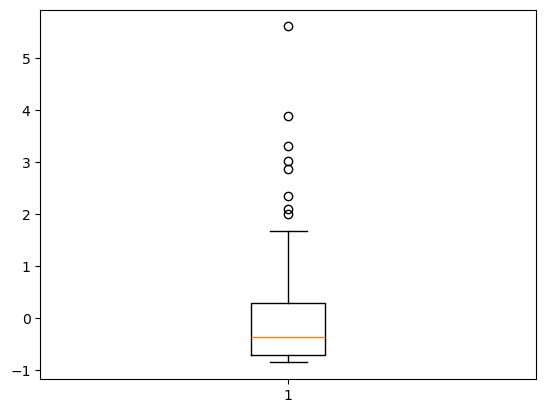

In [31]:
plt.boxplot(dfs.income)

In [32]:
dcon = pd.concat([df.loc[:,'country'],dfs],axis=1)
dcon.head()

,country,health,imports,income,inflation,life_expec,total_fer
0,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882
1,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973
2,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404
3,Angola,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151
4,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946


In [33]:
#hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
#hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
X = dcon.drop(['country'],axis=1)
hopkins(X)

0.9470511705652944

In [36]:
from sklearn.metrics import silhouette_score
sse = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append([k,silhouette_score(X, kmeans.labels_)])
    

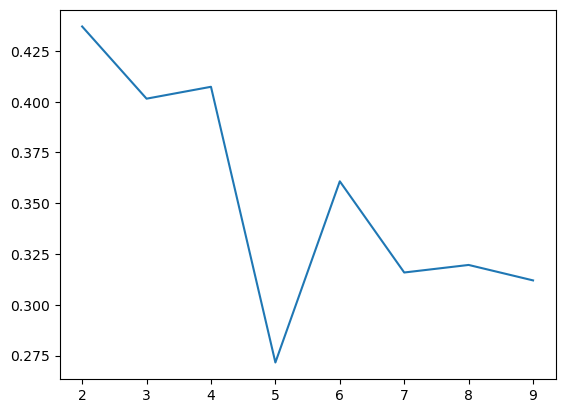

In [37]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1]);

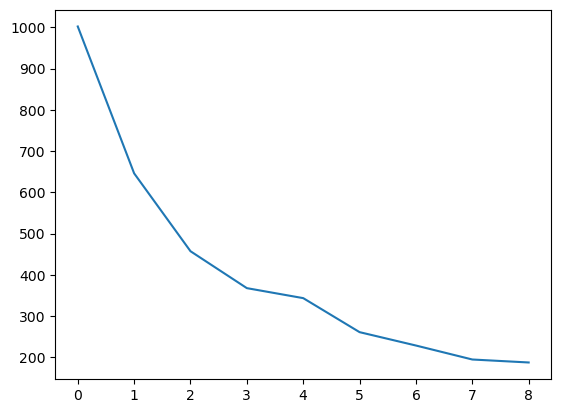

In [38]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(X)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [39]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(X)

KMeans(max_iter=50, n_clusters=5)

In [40]:
dat4=dcon
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.rename(columns = {0: "ClusterID"}, inplace = True)
dat_km.head()

,country,health,imports,income,inflation,life_expec,total_fer,ClusterID
0,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,1
1,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,3
2,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,3
3,Angola,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,1
4,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,3


In [41]:
dat_km['ClusterID'].value_counts()

ClusterID
3    85
1    49
0    31
4     1
2     1
Name: count, dtype: int64

<Axes: xlabel='imports', ylabel='inflation'>

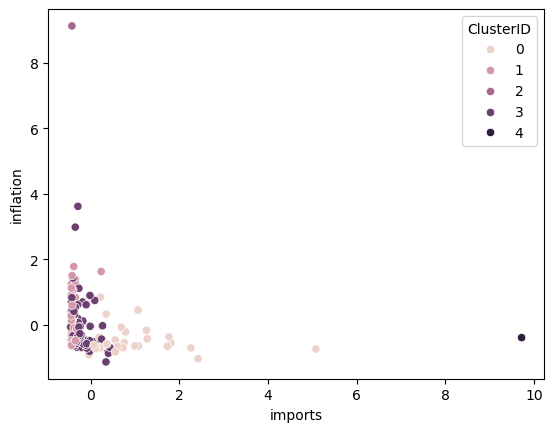

In [42]:
#Each cluster has a good number of countries associated with it (at least 5% of the dataset under consideration)
#Let's do some further visualizations.
#We'll be visualising the clusters on 'imports', 'inflation', and 'health'.
sns.scatterplot(x='imports',y='inflation',hue='ClusterID',legend='full',data=dat_km)

<Axes: xlabel='inflation', ylabel='health'>

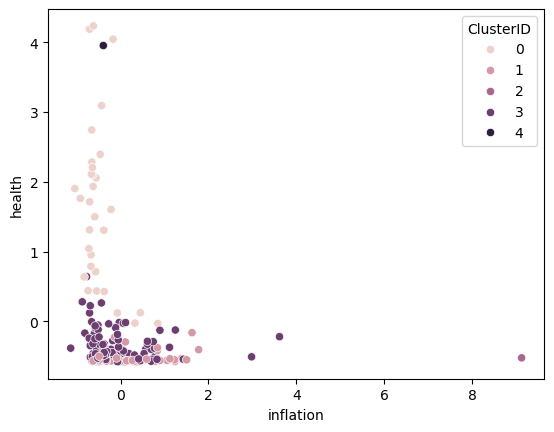

In [43]:
sns.scatterplot(x='inflation',y='health',hue='ClusterID',data=dat_km)

In [44]:
dcon.shape

(167, 7)

### Now making model with Outliers removal abd reassign them later

In [46]:
Qa = dcon.health.quantile(0.025)
Qb = dcon.health.quantile(0.975)
dcon = dcon[(dcon.health >= Qa) & (dcon.health <= Qb)]

Qa = dcon.imports.quantile(0.025)
Qb = dcon.imports.quantile(0.975)
dcon = dcon[(dcon.imports >= Qa) & (dcon.imports <= Qb)]

Qa = dcon.income.quantile(0.025)
Qb = dcon.income.quantile(0.975)
dcon = dcon[(dcon.income >= Qa) & (dcon.income <= Qb)]

Qa = dcon.inflation.quantile(0.025)
Qb = dcon.inflation.quantile(0.975)
dcon = dcon[(dcon.inflation >= Qa) & (dcon.inflation <= Qb)]

Qa = dcon.life_expec.quantile(0.025)
Qb = dcon.life_expec.quantile(0.975)
dcon = dcon[(dcon.life_expec >= Qa) & (dcon.life_expec <= Qb)]

Qa = dcon.total_fer.quantile(0.025)
Qb = dcon.total_fer.quantile(0.975)
dcon = dcon[(dcon.total_fer >= Qa) & (dcon.total_fer <= Qb)]



NameError: name 'dcon2' is not defined

In [53]:
rows = list(dcon.index)
dcon.rename(index={rows[i]:(i+1) for i in range(len(rows))}, inplace=True)
dcon.shape

(117, 7)

In [54]:
dcon.head()

,country,health,imports,income,inflation,life_expec,total_fer
1,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882
2,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973
3,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404
4,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946
5,Argentina,-0.123849,-0.336841,0.080920,1.244725,0.591474,-0.382933


In [55]:
dcon.shape

(117, 7)

In [56]:
X2 = dcon.drop(['country'],axis=1)
hopkins(X2)

0.8492073042400878

In [57]:
model_clus55 = KMeans(n_clusters = 5, max_iter=50)
model_clus55.fit(X2)

KMeans(max_iter=50, n_clusters=5)

In [58]:
dat5=dcon
dat5.index = pd.RangeIndex(len(dat5.index))
dat_km2 = pd.concat([dat5, pd.Series(model_clus55.labels_)], axis=1)
dat_km2.rename(columns = {0: "ClusterID"}, inplace = True)
dat_km2.head()

,country,health,imports,income,inflation,life_expec,total_fer,ClusterID
0,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,3
1,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,1
2,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,4
3,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,1
4,Argentina,-0.123849,-0.336841,0.080920,1.244725,0.591474,-0.382933,4


In [59]:
dat_km2['ClusterID'].value_counts()

ClusterID
1    44
3    24
0    21
4    15
2    13
Name: count, dtype: int64

In [60]:
dat_km2.shape


(117, 8)

In [61]:
dcon2 = pd.concat([df.loc[:,'country'],dfs],axis=1)
dcon2.head()

,country,health,imports,income,inflation,life_expec,total_fer
0,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882
1,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973
2,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404
3,Angola,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151
4,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946


In [62]:
dcon2.shape

(167, 7)

In [63]:
removed_countries = dcon2[~dcon2['country'].isin(dcon['country'])]


In [64]:
removed_countries.head()

,country,health,imports,income,inflation,life_expec,total_fer
3,Angola,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151
7,Australia,1.934367,0.290369,1.261966,-0.628316,1.290735,-0.674457
12,Bangladesh,-0.573523,-0.437938,-0.765062,-0.060901,-0.017559,-0.409435
15,Belgium,2.056822,1.812163,1.246357,-0.559999,1.065167,-0.720836
20,Bosnia and Herzegovina,-0.303464,-0.287960,-0.386295,-0.605544,0.704258,-1.085242


In [65]:
rvc = removed_countries.drop(['country'],axis=1)
rvc.head()

,health,imports,income,inflation,life_expec,total_fer
3,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151
7,1.934367,0.290369,1.261966,-0.628316,1.290735,-0.674457
12,-0.573523,-0.437938,-0.765062,-0.060901,-0.017559,-0.409435
15,2.056822,1.812163,1.246357,-0.559999,1.065167,-0.720836
20,-0.303464,-0.287960,-0.386295,-0.605544,0.704258,-1.085242


In [66]:
rvc['ClusterID'] = model_clus55.predict(rvc)


In [67]:
rvc.head()

,health,imports,income,inflation,life_expec,total_fer,ClusterID
3,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,3
7,1.934367,0.290369,1.261966,-0.628316,1.290735,-0.674457,2
12,-0.573523,-0.437938,-0.765062,-0.060901,-0.017559,-0.409435,0
15,2.056822,1.812163,1.246357,-0.559999,1.065167,-0.720836,2
20,-0.303464,-0.287960,-0.386295,-0.605544,0.704258,-1.085242,1


In [68]:
rc = pd.concat([removed_countries.loc[:,'country'],rvc],axis=1)

In [69]:
rc.head()

,country,health,imports,income,inflation,life_expec,total_fer,ClusterID
3,Angola,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,3
7,Australia,1.934367,0.290369,1.261966,-0.628316,1.290735,-0.674457,2
12,Bangladesh,-0.573523,-0.437938,-0.765062,-0.060901,-0.017559,-0.409435,0
15,Belgium,2.056822,1.812163,1.246357,-0.559999,1.065167,-0.720836,2
20,Bosnia and Herzegovina,-0.303464,-0.287960,-0.386295,-0.605544,0.704258,-1.085242,1


In [70]:
clusterdf = pd.concat([dat_km2,rc])


In [71]:
clusterdf.head()

,country,health,imports,income,inflation,life_expec,total_fer,ClusterID
0,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,3
1,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,1
2,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,4
3,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,1
4,Argentina,-0.123849,-0.336841,0.080920,1.244725,0.591474,-0.382933,4


In [72]:
clusterdf.shape

(167, 8)

In [73]:
clusterdf['ClusterID'].value_counts()

ClusterID
1    49
3    43
2    32
0    24
4    19
Name: count, dtype: int64

In [103]:
dat = clusterdf[['country', 'ClusterID']]
dat2 = pd.merge(df, dat, on='country')


In [107]:
dat2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,4
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


<Axes: xlabel='income', ylabel='gdpp'>

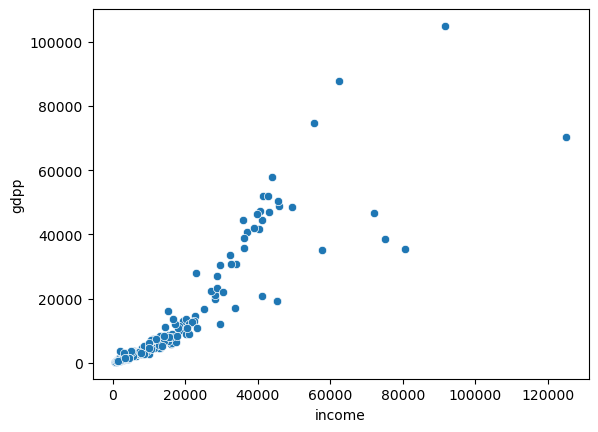

In [109]:
sns.scatterplot(x='income',y='gdpp',data=dat2)

<Axes: xlabel='health', ylabel='child_mort'>

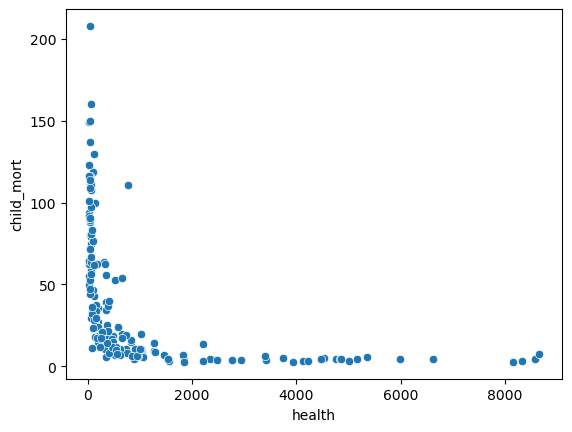

In [111]:
sns.scatterplot(x='health',y='child_mort',data=dat2)

<Axes: xlabel='ClusterID', ylabel='health'>

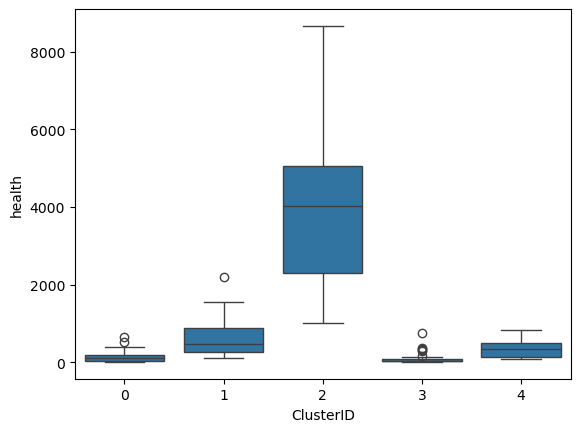

In [113]:
sns.boxplot(x='ClusterID', y='health', data=dat2)

<Axes: xlabel='ClusterID', ylabel='child_mort'>

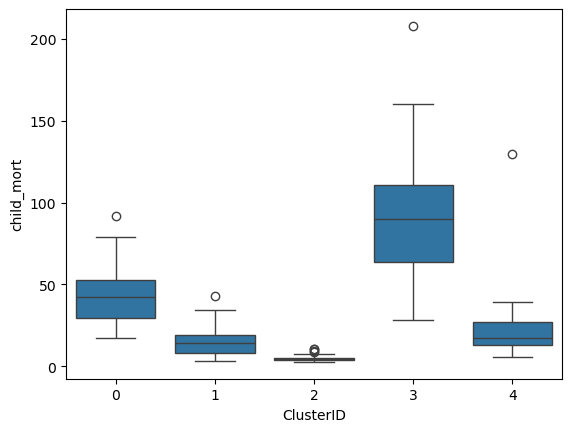

In [115]:
sns.boxplot(x='ClusterID', y='child_mort', data=dat2)

<Axes: xlabel='ClusterID', ylabel='gdpp'>

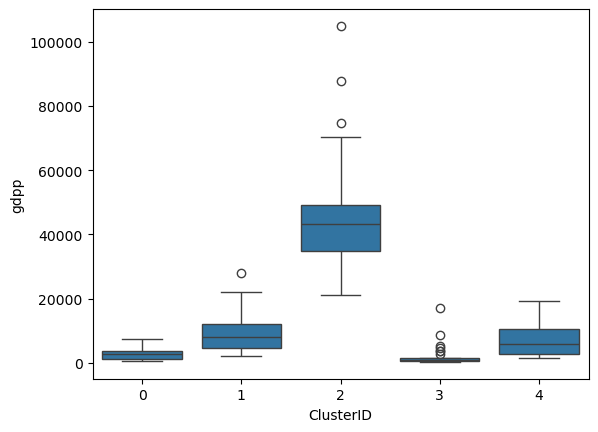

In [117]:
sns.boxplot(x='ClusterID', y='gdpp', data=dat2)

<Axes: xlabel='ClusterID', ylabel='life_expec'>

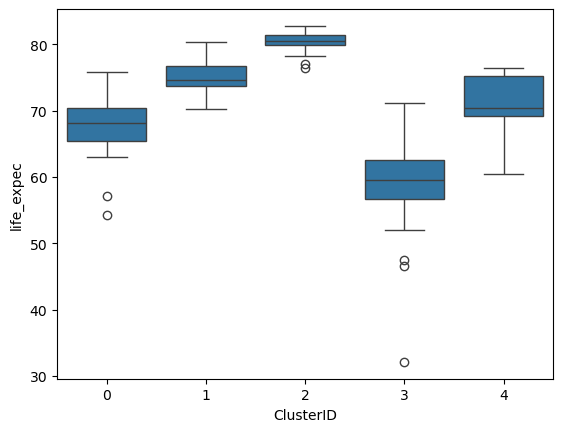

In [119]:
sns.boxplot(x='ClusterID', y='life_expec', data=dat2)

In [121]:
dat22 = dat_km2[['country', 'ClusterID']]
modl = pd.merge(df, dat22, on='country')


In [123]:
modl.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,4
3,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
4,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,4


In [125]:
modl.shape

(117, 11)

<Axes: xlabel='ClusterID', ylabel='health'>

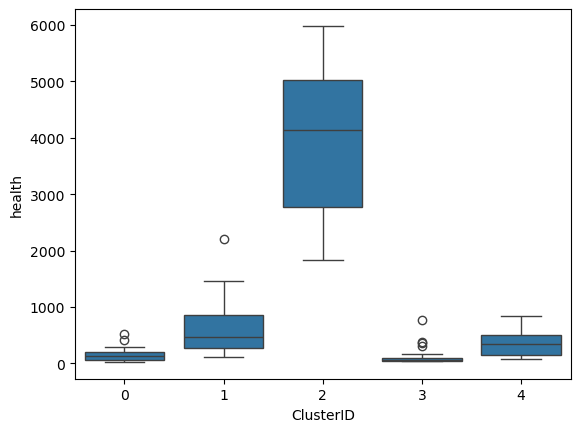

In [127]:
sns.boxplot(x='ClusterID', y='health', data=modl)